In [2]:
import geopandas as gpd
import fiona
import pandas as pd
import zipfile
import mapclassify
import matplotlib.pyplot as plt

In [4]:
fiona.listlayers('EJSCREEN_2020_StatePctile.gdb')

# Read file from File Geodatabase
fp = 'EJSCREEN_2020_StatePctile.gdb'
data = gpd.read_file(fp, driver="FileGDB")

In [34]:

column_list = [
    "ID",
    "geometry", 
    "STATE_NAME",
    "D_LDPNT_2", 
    "D_DSLPM_2", 
    "D_CANCR_2", 
    "D_RESP_2", 
    "D_PTRAF_2", 
    "D_PWDIS_2", 
    "D_PNPL_2", 
    "D_PRMP_2", 
    "D_PTSDF_2", 
    "D_OZONE_2", 
    "D_PM25_2"
]

df = data[column_list]
df.geometry = df.geometry.centroid
df.to_file("ejscreen.shp")

/Users/danhammer/streamlitenv/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [35]:
usstates = gpd.read_file("ejscreen.shp")

In [62]:
gdf = usstates[
    (usstates.STATE_NAME != 'Alaska') & 
    (usstates.STATE_NAME != 'Hawaii') & 
    (usstates.STATE_NAME != 'Puerto Rico')
]

gdf = gdf.to_crs("EPSG:4326")
gdf['lon'] = gdf.geometry.x
gdf['lat'] = gdf.geometry.y
# gdf.drop(columns=['geometry'])

In [66]:
nation = gdf[["ID", "D_PM25_2", "lon", "lat"]].copy()
nation["perc"] = nation.D_PM25_2.rank(pct = True)

In [67]:
nation.to_csv('viz.csv', index=False)

In [11]:
gdf.geometry = gdf.geometry.centroid

In [17]:
zf = zipfile.ZipFile('EJSCREEN_2020_StatePctile.csv.zip')

column_list = [
    "ID", 
    "D_LDPNT_2", 
    "D_DSLPM_2", 
    "D_CANCR_2", 
    "D_RESP_2", 
    "D_PTRAF_2", 
    "D_PWDIS_2", 
    "D_PNPL_2", 
    "D_PRMP_2", 
    "D_PTSDF_2", 
    "D_OZONE_2", 
    "D_PM25_2"
]

df = pd.read_csv(
    zf.open('EJSCREEN_2020_StatePctile.csv'),
    usecols=column_list,
    na_values='None'
)

df[["year"]] = 2020


In [32]:
gdf.ID = gdf.ID.astype('str')
df.ID = df.ID.astype('str')
x = gdf.merge(df, how='left', on=["ID"])

In [33]:
x

,ID,STATE_NAME,geometry,D_PM25_2,D_OZONE_2,D_DSLPM_2,D_CANCR_2,D_RESP_2,D_PTRAF_2,D_LDPNT_2,D_PNPL_2,D_PRMP_2,D_PTSDF_2,D_PWDIS_2,year
0,1420266409,Alabama,POINT (-9628090.093 3824628.290),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1420266410,Alabama,POINT (-9627986.656 3827259.581),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1420267409,Alabama,POINT (-9626350.634 3826496.096),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1420267410,Alabama,POINT (-9625885.308 3824509.632),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1420268409,Alabama,POINT (-9624777.964 3826443.059),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216325,2113762521,Wyoming,POINT (-11664023.952 5464325.250),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216326,2113762522,Wyoming,POINT (-11629840.963 5429422.043),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216327,2113764521,Wyoming,POINT (-11605897.678 5447140.500),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216328,2113764522,Wyoming,POINT (-11597348.273 5442895.733),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Open the data
# NOTE that the names on the data from the EJSCREEN FTP server is inconsistent

res = []

for year in [2018, 2019, 2020]:
    zf = zipfile.ZipFile('EJSCREEN_%s_StatePctile.csv.zip' % year) 
    column_list = ["ID", "D_LDPNT_2", "D_DSLPM_2", "D_CANCR_2", "D_RESP_2", "D_PTRAF_2", "D_PWDIS_2", "D_PNPL_2", "D_PRMP_2", "D_PTSDF_2", "D_OZONE_2", "D_PM25_2"]
    df = pd.read_csv(
        zf.open('EJSCREEN_%s_StatePctile.csv' % year),
        usecols=column_list,
        na_values='None'
    )
    df[["year"]] = year
    res.append(df)
    
rdf = gpd.GeoDataFrame(pd.concat(res, ignore_index=True))

In [54]:
rdf.to_pickle("data.pkl")

In [3]:
rdf = pd.read_pickle("data.pkl")
recent_target = rdf[rdf.year == 2020][["ID", "D_RESP_2"]].dropna()
recent_target.ID = recent_target.ID.astype("str") 
usstates.ID = usstates.ID.astype("str") 
x = usstates.merge(recent_target, how='inner', on=["ID"])

NameError: name 'usstates' is not defined

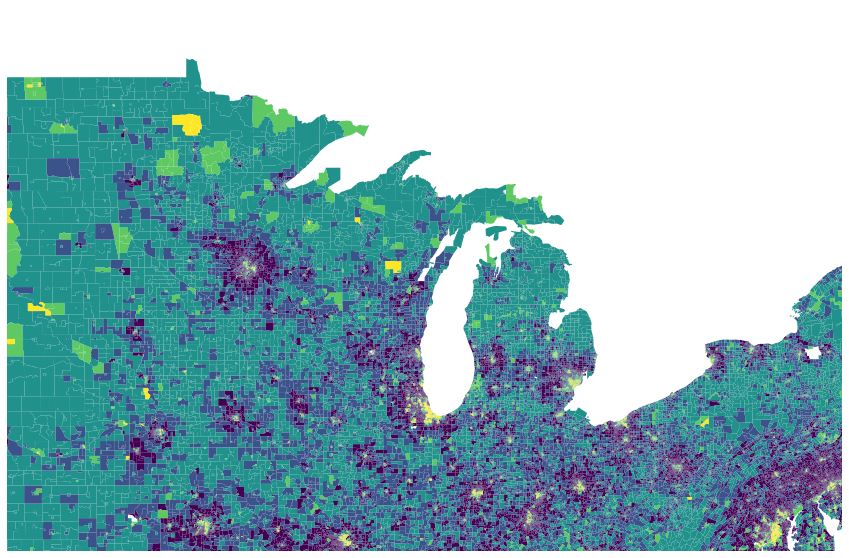

In [7]:
ax = x.plot(
    column='D_RESP_2', 
    cmap='viridis', 
    figsize=(20,10), 
    legend=False,
    linewidth=-1,
    scheme='quantiles'
)


ax.set_xlim([-11210421, -8328249])
ax.set_ylim([4640406, 6516520])
ax.axis('off')
plt.savefig('zoom.png', dpi=300)

(array([2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00,
        0.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 7.000e+00, 4.000e+00, 5.000e+00, 5.000e+00, 1.000e+00,
        6.000e+00, 5.000e+00, 7.000e+00, 7.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 7.000e+00, 7.000e+00,
        6.000e+00, 1.000e+01, 7.000e+00, 7.000e+00, 6.000e+00, 1.200e+01,
        1.000e+01, 9.000e+00, 1.400e+01, 7.000e+00, 7.000e+00, 1.100e+01,
        1.100e+01, 1.000e+01, 7.000e+00, 8.000e+00, 9.000e+00, 1.200e+01,
        1.900e+01, 1.900e+01, 1.100e+0

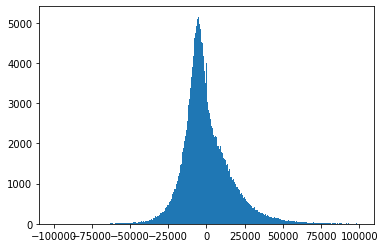

In [36]:
import matplotlib.pyplot as plt
plt.hist(df.D_OZONE_2[(df.D_OZONE_2 < 100000) & (df.D_OZONE_2 > -100000)], bins='auto')